In [111]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [112]:
QUERY_ROOT = "https://api.github.com"
TOKEN = '' # write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [113]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.
# YOUR CODE BELOW
df = pd.read_csv('homebrew_homebrew-core_3/homebrew_homebrew-core_3.csv')
df.columns = ['contributor', 'bothunter']
display(df)

,contributor,bothunter
0,TanvirBhuiyan19,Human
1,AkihiroSuda,Human
2,xwjdsh,Human
3,spaam,Human
4,messense,Human
5,woodruffw,Human
6,dev-errant,Human
7,ryenus,Human
8,coffeegoddd,Human
9,scpeters,Human


In [114]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
contributors = df.contributor.to_list()
print(contributors)

['TanvirBhuiyan19', 'AkihiroSuda', 'xwjdsh', 'spaam', 'messense', 'woodruffw', 'dev-errant', 'ryenus', 'coffeegoddd', 'scpeters', 'fsouza', 'p-linnane', 'bashofmann', 'aliscott', 'chenrui333', 'henryiii', 'blockstack-devops', 'mrexox', 'grafanabot', 'chiefmikey', 'ArduinoBot', 'ik11235', 'zmwangx', 'sayomaki', 'issyl0', 'makigumo', 'efiop', 'semgrep-ci[bot]', 'danielnachun', 'mxcl', 'phpstan-bot', 'sami-alajrami', 'uyjulian', 'MikeMcQuaid', 'pthariensflame', 'mise-en-dev', 'miles170', 'huacnlee', 'svc-devtoolsbot', 'github-actions[bot]']


In [115]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW

app_list_dict = []
for contributor in tqdm(contributors):
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    if json_response['type'] == 'Bot':
        app_list_dict.append({'contributor': contributor, 'app': True})
    else:
        app_list_dict.append({'contributor': contributor, 'app': False})
app_df = pd.DataFrame.from_dict(app_list_dict)
display(app_df)
    

100%|██████████| 40/40 [00:09<00:00,  4.07it/s]


,contributor,app
0,TanvirBhuiyan19,False
1,AkihiroSuda,False
2,xwjdsh,False
3,spaam,False
4,messense,False
5,woodruffw,False
6,dev-errant,False
7,ryenus,False
8,coffeegoddd,False
9,scpeters,False


### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [116]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df = pd.merge(df, app_df, on='contributor')
display(df)

,contributor,bothunter,app
0,TanvirBhuiyan19,Human,False
1,AkihiroSuda,Human,False
2,xwjdsh,Human,False
3,spaam,Human,False
4,messense,Human,False
5,woodruffw,Human,False
6,dev-errant,Human,False
7,ryenus,Human,False
8,coffeegoddd,Human,False
9,scpeters,Human,False


### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [117]:
# Count the number of GitHub Apps
num_apps = len(df[df['app'] == True])

# Count the number of User accounts
num_users = len(df[df['app'] == False])

# Print the results
print("Total number of GitHub Apps:", num_apps)
print("Total number of User accounts:", num_users)


Total number of GitHub Apps: 2
Total number of User accounts: 38


## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [118]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW
bodegha_df = pd.read_csv('homebrew_homebrew-core_3/bodegha_predictions.csv')
display(bodegha_df)


,contributor,prediction
0,AkihiroSuda,Bot
1,github-actions[bot],Bot
2,grafanabot,Bot
3,mrexox,Bot
4,phpstan-bot,Bot
5,sami-alajrami,Bot
6,MikeMcQuaid,Human
7,chenrui333,Human
8,chiefmikey,Human
9,ik11235,Human


In [119]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW
#use merge but bodegha has to be merged with contributor with the same numbers of columns than df
df = pd.merge(df, bodegha_df,how='left', on='contributor')
#replace Nan by unknown
df['prediction'] = df['prediction'].fillna('unknown')
display(df)


,contributor,bothunter,app,prediction
0,TanvirBhuiyan19,Human,False,unknown
1,AkihiroSuda,Human,False,Bot
2,xwjdsh,Human,False,unknown
3,spaam,Human,False,unknown
4,messense,Human,False,unknown
5,woodruffw,Human,False,Human
6,dev-errant,Human,False,unknown
7,ryenus,Human,False,unknown
8,coffeegoddd,Human,False,unknown
9,scpeters,Human,False,Human


In [120]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW
rabbit_predictions = pd.read_csv('homebrew_homebrew-core_3/rabbit_predictions.csv')
display(rabbit_predictions)


,Unnamed: 0,contributor,prediction,confidence
0,0,TanvirBhuiyan19,human,0.984
1,1,AkihiroSuda,human,0.999
2,2,xwjdsh,human,0.999
3,3,spaam,bot,0.976
4,4,messense,human,0.994
5,5,woodruffw,human,0.998
6,6,dev-errant,bot,0.637
7,7,ryenus,human,0.999
8,8,coffeegoddd,bot,0.771
9,9,scpeters,human,1.000


In [121]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
df = pd.merge(df, rabbit_predictions, on='contributor')
display(df)

,contributor,bothunter,app,prediction_x,Unnamed: 0,prediction_y,confidence
0,TanvirBhuiyan19,Human,False,unknown,0,human,0.984
1,AkihiroSuda,Human,False,Bot,1,human,0.999
2,xwjdsh,Human,False,unknown,2,human,0.999
3,spaam,Human,False,unknown,3,bot,0.976
4,messense,Human,False,unknown,4,human,0.994
5,woodruffw,Human,False,Human,5,human,0.998
6,dev-errant,Human,False,unknown,6,bot,0.637
7,ryenus,Human,False,unknown,7,human,0.999
8,coffeegoddd,Human,False,unknown,8,bot,0.771
9,scpeters,Human,False,Human,9,human,1.000


In [122]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency
df = df.rename(columns={'prediction_x': 'bodegha', 'prediction_y': 'rabbit'})

# YOUR CODE BELOW
df['rabbit'] = df['rabbit'].replace({'bot': 'Bot', 'app': 'Bot', 'human': 'Human', 'unknown': 'Unknown'}) 
df['bodegha'] = df['bodegha'].replace({ 'unknown': 'Unknown'})
#delete colums 
df = df.drop(columns=['confidence','Unnamed: 0'])
display(df)

,contributor,bothunter,app,bodegha,rabbit
0,TanvirBhuiyan19,Human,False,Unknown,Human
1,AkihiroSuda,Human,False,Bot,Human
2,xwjdsh,Human,False,Unknown,Human
3,spaam,Human,False,Unknown,Bot
4,messense,Human,False,Unknown,Human
5,woodruffw,Human,False,Human,Human
6,dev-errant,Human,False,Unknown,Bot
7,ryenus,Human,False,Unknown,Human
8,coffeegoddd,Human,False,Unknown,Bot
9,scpeters,Human,False,Human,Human


### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [123]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW


In [124]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW

### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [125]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit and type

# YOUR CODE BELOW


# Assuming the existing DataFrame is named df
df['type'] = df[['bothunter', 'bodegha', 'rabbit']].apply(lambda x: 'Bot' if 'Bot' in x.values else 'Human', axis=1)
df = df[['contributor', 'bothunter', 'app', 'bodegha', 'rabbit', 'type']]



In [126]:
display(df)              

,contributor,bothunter,app,bodegha,rabbit,type
0,TanvirBhuiyan19,Human,False,Unknown,Human,Human
1,AkihiroSuda,Human,False,Bot,Human,Bot
2,xwjdsh,Human,False,Unknown,Human,Human
3,spaam,Human,False,Unknown,Bot,Bot
4,messense,Human,False,Unknown,Human,Human
5,woodruffw,Human,False,Human,Human,Human
6,dev-errant,Human,False,Unknown,Bot,Bot
7,ryenus,Human,False,Unknown,Human,Human
8,coffeegoddd,Human,False,Unknown,Bot,Bot
9,scpeters,Human,False,Human,Human,Human


### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [127]:
converted_df = aggregate_raters(np.array(df[['bothunter', 'rabbit']]))
kappa = fleiss_kappa(converted_df[0])
print('kappa:', kappa)


kappa: 0.4188861985472156


#### b. between bothunter and bodegha

In [128]:
converted_df = aggregate_raters(np.array(df[['bothunter', 'bodegha']]))
kappa = fleiss_kappa(converted_df[0])
print('kappa:', kappa)


kappa: -0.1903540277065161


#### c. between bodegha and rabbit

In [129]:
converted_df = aggregate_raters(np.array(df[['bodegha', 'rabbit']]))
kappa = fleiss_kappa(converted_df[0])
print('kappa:', kappa)

kappa: -0.20446818844099077


#### d. between bothunter, bodegha and rabbit

In [130]:
converted_df = aggregate_raters(np.array(df[['bothunter', 'rabbit', 'bodegha']]))
kappa = fleiss_kappa(converted_df[0])
print('kappa:', kappa)

kappa: 0.01686060318214208


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [131]:
# there is a moderate agreement between rabbit and bothunter while the others are slights or do not have agreements 

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [132]:
# i will use bothunter and rabbit 

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [133]:
# Create an empty list to store the JSON responses
json_responses = []

# Iterate over each contributor
for contributor in contributors:
    # Make a request to the GitHub Events API for each contributor
    page = 1
    while True:
        # Construct the query URL
        query = f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}'

        # Make the request with the required headers
        response = requests.get(query, headers=HEADERS)

        # Convert the response to JSON
        json_response = response.json()

        # Append the JSON response to the list
        json_responses.append(json_response)

        # Break the loop if there are no more events or if we have reached the maximum of 300 events
        if len(json_response) == 0 or page == 3:
            break

        # Increment the page number
        page += 1

# Extract the required fields from each JSON response and store them in a list of dictionaries
events_list = []
for json_response in json_responses:
    for event in json_response:
        event_id = event['id']
        contributor = event['actor']['login']
        repo_name = event['repo']['name'] 
        event_type = event['type']
        created_at = event['created_at']

        events_list.append({'event_id': event_id, 'contributor': contributor, 'repo_name': repo_name, 'event_type': event_type, 'created_at': created_at})

# Convert the list of dictionaries to a DataFrame
df_events = pd.DataFrame(events_list)

# Display the resulting DataFrame
display(df_events)


,event_id,contributor,repo_name,event_type,created_at
0,36619627668,TanvirBhuiyan19,CodeWaveWithAsante/FLAVORVERSE,WatchEvent,2024-03-17T11:25:42Z
1,36619627528,TanvirBhuiyan19,NanmiCoder/MediaCrawler,WatchEvent,2024-03-17T11:25:41Z
2,36619627385,TanvirBhuiyan19,tiangolo/full-stack-fastapi-template,WatchEvent,2024-03-17T11:25:40Z
3,36619626389,TanvirBhuiyan19,Talha836902/amazon-clone-main,WatchEvent,2024-03-17T11:25:32Z
4,36616459909,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-17T04:24:44Z
...,...,...,...,...,...
9487,37000966388,github-actions[bot],kuahsjkammak/passport,PushEvent,2024-03-29T14:46:09Z
9488,37000958224,github-actions[bot],sadewa1609/sadewalava,PushEvent,2024-03-29T14:45:48Z
9489,37000957105,github-actions[bot],thedoggybrad/easylist-mirror,PushEvent,2024-03-29T14:45:46Z
9490,37000968006,github-actions[bot],diveflix/status,PushEvent,2024-03-29T14:46:13Z


### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  %
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [134]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']




In [135]:
# Group each event into the four categories: Issues, Pull Requests, Commits, Repository

# Define the event groups
issues_group = ['IssueCommentEvent', 'IssuesEvent']
pull_requests_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commits_group = ['CommitCommentEvent', 'PushEvent']
repository_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

# Add a column called event_group
df_events['event_group'] = df_events['event_type'].apply(lambda x: 'Issues' if x in issues_group else ('Pull Requests' if x in pull_requests_group else ('Commits' if x in commits_group else 'Repository')))

# Perform groupby on ['contributor','event_group']
grouped_df = df_events.groupby(['contributor', 'event_group']).size().reset_index(name='count')

# Pivot the dataframe
pivot_df = grouped_df.pivot(index='contributor', columns='event_group', values='count').fillna(0)

pivot_df



event_group,Commits,Issues,Pull Requests,Repository
contributor,,,,
AkihiroSuda,47.0,37.0,100.0,98.0
ArduinoBot,1.0,0.0,27.0,8.0
MikeMcQuaid,43.0,86.0,73.0,98.0
TanvirBhuiyan19,3.0,0.0,0.0,84.0
aliscott,61.0,4.0,149.0,83.0
bashofmann,67.0,17.0,65.0,99.0
blockstack-devops,34.0,101.0,6.0,69.0
chenrui333,63.0,16.0,54.0,120.0
chiefmikey,132.0,7.0,62.0,67.0


In [136]:
pivot_df.columns
#reset index of pivot_df
pivot_df.reset_index(inplace=True)

In [137]:
display(pivot_df)

event_group,contributor,Commits,Issues,Pull Requests,Repository
0,AkihiroSuda,47.0,37.0,100.0,98.0
1,ArduinoBot,1.0,0.0,27.0,8.0
2,MikeMcQuaid,43.0,86.0,73.0,98.0
3,TanvirBhuiyan19,3.0,0.0,0.0,84.0
4,aliscott,61.0,4.0,149.0,83.0
5,bashofmann,67.0,17.0,65.0,99.0
6,blockstack-devops,34.0,101.0,6.0,69.0
7,chenrui333,63.0,16.0,54.0,120.0
8,chiefmikey,132.0,7.0,62.0,67.0
9,coffeegoddd,44.0,67.0,75.0,54.0


In [138]:
#finally merge it with your 'type' field from the DataFrame you got in Section4
pivot_df = pivot_df.merge(df[['contributor', 'type']], on='contributor')
final_df = pivot_df
display(pivot_df)


,contributor,Commits,Issues,Pull Requests,Repository,type
0,AkihiroSuda,47.0,37.0,100.0,98.0,Bot
1,ArduinoBot,1.0,0.0,27.0,8.0,Bot
2,MikeMcQuaid,43.0,86.0,73.0,98.0,Human
3,TanvirBhuiyan19,3.0,0.0,0.0,84.0,Human
4,aliscott,61.0,4.0,149.0,83.0,Human
5,bashofmann,67.0,17.0,65.0,99.0,Human
6,blockstack-devops,34.0,101.0,6.0,69.0,Bot
7,chenrui333,63.0,16.0,54.0,120.0,Bot
8,chiefmikey,132.0,7.0,62.0,67.0,Human
9,coffeegoddd,44.0,67.0,75.0,54.0,Bot


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [139]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [140]:
# YOUR CODE BELOW
medians = []
for event_group in pivot_df.columns[1:-1]:
    for type in pivot_df['type'].unique():
        median = pivot_df[pivot_df['type'] == type][event_group].median()
        medians.append({'event_group': event_group, 'median': median, 'type': type})

df_medians = pd.DataFrame.from_dict(medians)
display(df_medians)

,event_group,median,type
0,Commits,55.0,Bot
1,Commits,72.0,Human
2,Issues,9.0,Bot
3,Issues,20.5,Human
4,Pull Requests,42.5,Bot
5,Pull Requests,61.5,Human
6,Repository,70.5,Bot
7,Repository,83.5,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [141]:
# Main DataFrame
#medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
 #          {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
  #         {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
   #        {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
    #       {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
     #      {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
      #     {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
       #    {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
#df_medians = pd.DataFrame.from_dict(medians)
#df_medians

In [142]:
# pivot the main DataFrame

df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,Commits,Issues,Pull Requests,Repository
type,,,,
Bot,55.0,9.0,42.5,70.5
Human,72.0,20.5,61.5,83.5


event_group,Commits,Issues,Pull Requests,Repository
type,,,,
Bot,55.0,9.0,42.5,70.5
Human,72.0,20.5,61.5,83.5


<Axes: xlabel='event_group', ylabel='type'>

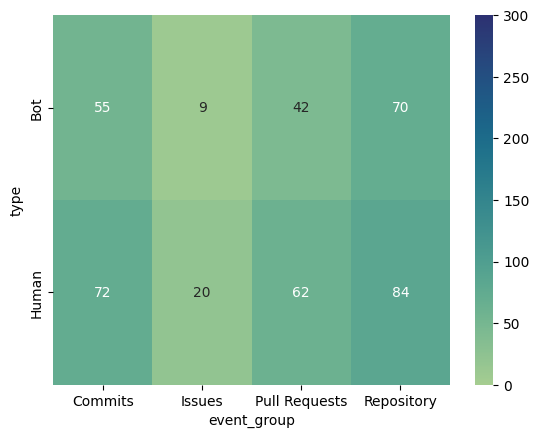

In [143]:
# YOUR CODE BELOW
pivot_df = df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)
display(pivot_df)

sns.heatmap(pivot_df, annot=True, vmin=0, vmax=300, cmap="crest")



#### What is the difference that you observe between Bots+Apps and Humans?

In [144]:
#Humans are globally more active than bots

#### What is the difference that you observe between Event groups?

In [145]:
#The difference i observe between the event groups is that the number of events is higher for humans than for bots in all event groups
#For one repository we have a ratio close to 1 for commits, and pull requests but for the issues, we are close to 25% of the 
#Issues are rarely used by bots, meanwhile the humans create more issues

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [146]:
#Humans are creating more issues than bots while the ratio of the others is almost the same

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

<Axes: ylabel='Pull Requests'>

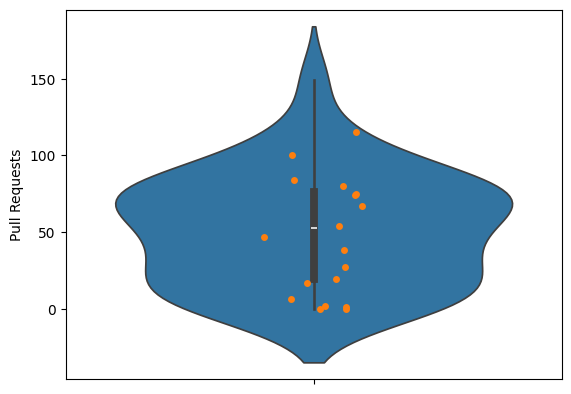

In [147]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
#plot the number of events from each pull request event group

sns.violinplot(data=final_df, y='Pull Requests')

# YOUR CODE BELOW - Visualize number of events from pull request event group
# plot the number of events from each pull request event group
sns.stripplot(data=final_df[final_df.type=='Bot'], y='Pull Requests')




<Axes: ylabel='Issues'>

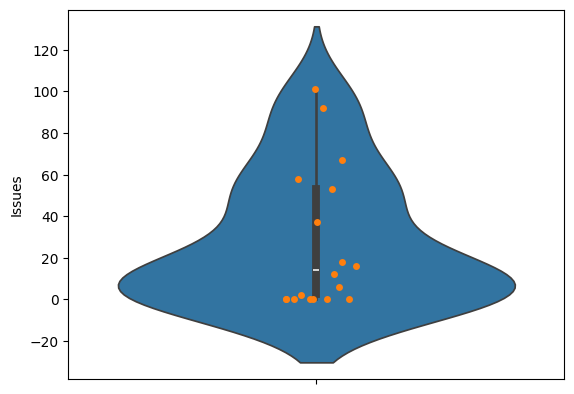

In [148]:
# YOUR CODE BELOW - Visualise number of events from issue event group
#plot the number of events from each issue event group

sns.violinplot(data=final_df, y='Issues')

# YOUR CODE BELOW - Visualise number of events from issue event group
# plot the number of events from each issue event group
sns.stripplot(data=final_df[final_df.type=='Bot'], y='Issues')

<Axes: ylabel='Commits'>

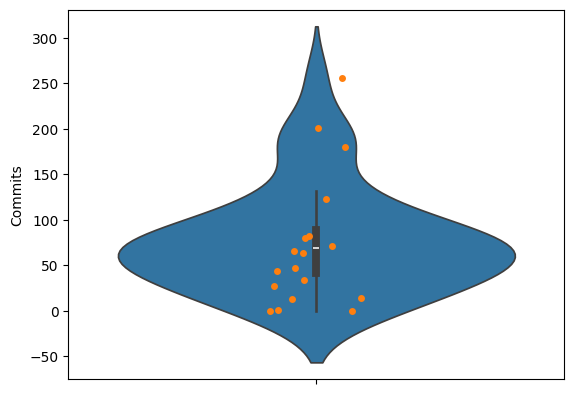

In [149]:
# YOUR CODE BELOW - Visualise number of events from commit event group

sns.violinplot(data=final_df, y='Commits')

# YOUR CODE BELOW - Visualise number of events from commit event group
sns.stripplot(data=final_df[final_df.type=='Bot'], y='Commits')




<Axes: ylabel='Repository'>

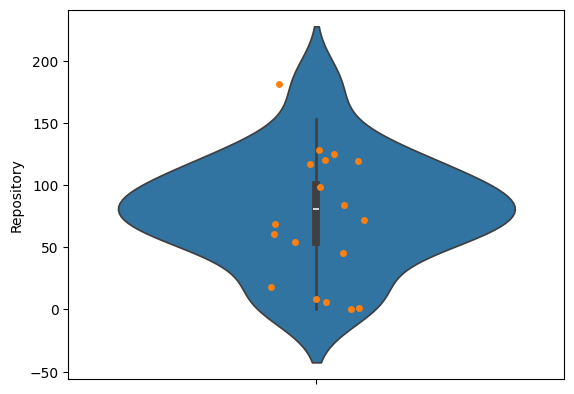

In [150]:
# YOUR CODE BELOW - Visualise number of events from repo event group

sns.violinplot(data=final_df, y='Repository')

# YOUR CODE BELOW - Visualise number of events from repo event group
sns.stripplot(data=final_df[final_df.type=='Bot'], y='Repository')



### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [151]:
from scipy.stats import shapiro
# YOUR CODE BELOW

# Perform Shapiro-Wilk test for each event group
for event_group in ["Commits", "Issues", "Pull Requests", "Repository"]:
    # Remove NaN values
    print(f"{event_group}: {shapiro(final_df[event_group].dropna())}")


Commits: ShapiroResult(statistic=0.8991351047862737, pvalue=0.0018042739025921524)
Issues: ShapiroResult(statistic=0.8365308546832457, pvalue=4.3076237750436416e-05)
Pull Requests: ShapiroResult(statistic=0.9548811516534303, pvalue=0.11170390973645228)
Repository: ShapiroResult(statistic=0.9691089523881323, pvalue=0.3371385329775041)


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [152]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

# List of event groups
event_groups = ['Commits', 'Issues', 'Pull Requests', 'Repository']

# Perform statistical tests for all pairs of event groups
for i in range(len(event_groups)):
    for j in range(i+1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        # Get the data for the two event groups
        data_group1 = grouped_df[grouped_df['event_group'] == group1]['count']
        data_group2 = grouped_df[grouped_df['event_group'] == group2]['count']
        
        # Check normality assumption using Shapiro-Wilk test
        _, p1 = shapiro(data_group1)
        _, p2 = shapiro(data_group2)
        
        if p1 < 0.05 or p2 < 0.05:
            # Use Mann-Whitney U test
            _, p = mannwhitneyu(data_group1, data_group2)
            test_type = 'Mann-Whitney U test'
        else:
            # Use independent t-test
            _, p = ttest_ind(data_group1, data_group2)
            test_type = 'Independent t-test'
        
        # Print the results
        print(f"Comparison between {group1} and {group2}:")
        print(f"Test type: {test_type}")
        print(f"p-value: {p}")
        print("")



Comparison between Commits and Issues:
Test type: Mann-Whitney U test
p-value: 0.0005112483821043918

Comparison between Commits and Pull Requests:
Test type: Mann-Whitney U test
p-value: 0.0992962325713343

Comparison between Commits and Repository:
Test type: Mann-Whitney U test
p-value: 0.313060209401386

Comparison between Issues and Pull Requests:
Test type: Mann-Whitney U test
p-value: 0.025796026401567886

Comparison between Issues and Repository:
Test type: Mann-Whitney U test
p-value: 1.9119912894675914e-05

Comparison between Pull Requests and Repository:
Test type: Independent t-test
p-value: 0.004685409475510125



### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [153]:
import cliffsDelta
# YOU CODE BELOW
event_groups = ["Commits", "Issues", "Pull Requests", "Repository"]

# Iterate over all pairs of event groups
for i in range(len(event_groups)):
    for j in range(i+1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        # Perform Shapiro-Wilk test for both event groups
        _, p1 = shapiro(final_df[group1].dropna())
        _, p2 = shapiro(final_df[group2].dropna())
        
        # If H0 is rejected in Shapiro-Wilk test for either group, use Mann-Whitney U test
        if p1 < 0.05 or p2 < 0.05:
            _, p = mannwhitneyu(final_df[group1].dropna(), final_df[group2].dropna(), method='exact', nan_policy='omit')
            test = 'Mann-Whitney U'
        # If H0 is not rejected in Shapiro-Wilk test for both groups, use independent t-test
        else:
            _, p = ttest_ind(final_df[group1].dropna(), final_df[group2].dropna(), nan_policy='omit')
            test = 'Independent t-test'
        
        # If H0 is rejected, calculate Cliff's Delta
        if p < 0.01:
            delta, size = cliffsDelta.cliffsDelta(final_df[group1].dropna().tolist(), final_df[group2].dropna().tolist())
            print(f"Cliff's Delta between {group1} and {group2}: delta = {delta}, size = {size}")

Cliff's Delta between Commits and Issues: delta = 0.535625, size = large
Cliff's Delta between Issues and Pull Requests: delta = -0.376875, size = medium
Cliff's Delta between Issues and Repository: delta = -0.6525, size = large
Cliff's Delta between Pull Requests and Repository: delta = -0.383125, size = medium


### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [197]:
# YOUR CODE BELOW - function for seaborn plot

def create_violinplot(data, x=None, y=None, hue=None):
    # Create a violin plot
    sns.violinplot(data=data, x=x, y=y, hue=hue)

    # Create a strip plot for the Bot type using rabbit's predictions
    sns.stripplot(data=data[data['type'] == 'Bot'], x=x, y=y, hue=hue)

# This df is used for events
merged_df = df_events.merge(final_df, on='contributor')
event_counts = merged_df.groupby(['contributor', 'event_type']).size().reset_index(name='count')

count_df = merged_df.groupby(['contributor', 'event_type']).size().reset_index(name='count')

#merge count_df to get the type of the contributor 
count_df = count_df.merge(final_df, on='contributor')
#merge count_df to get the event_group of the event_type and drop duplicates on contributor and event_type
count_df = count_df.merge(df_events[['event_type', 'event_group']].drop_duplicates(), on='event_type')


count_df


,contributor,event_type,count,Commits,Issues,Pull Requests,Repository,type,event_group
0,AkihiroSuda,CreateEvent,10,47.0,37.0,100.0,98.0,Bot,Repository
1,AkihiroSuda,IssueCommentEvent,29,47.0,37.0,100.0,98.0,Bot,Issues
2,AkihiroSuda,IssuesEvent,8,47.0,37.0,100.0,98.0,Bot,Issues
3,AkihiroSuda,PullRequestEvent,32,47.0,37.0,100.0,98.0,Bot,Pull Requests
4,AkihiroSuda,PullRequestReviewCommentEvent,68,47.0,37.0,100.0,98.0,Bot,Pull Requests
...,...,...,...,...,...,...,...,...,...
295,xwjdsh,PullRequestReviewEvent,1,87.0,12.0,19.0,75.0,Human,Repository
296,xwjdsh,PushEvent,85,87.0,12.0,19.0,75.0,Human,Commits
297,xwjdsh,WatchEvent,35,87.0,12.0,19.0,75.0,Human,Repository
298,zmwangx,CreateEvent,1,71.0,0.0,0.0,1.0,Bot,Repository


#### Total number of events

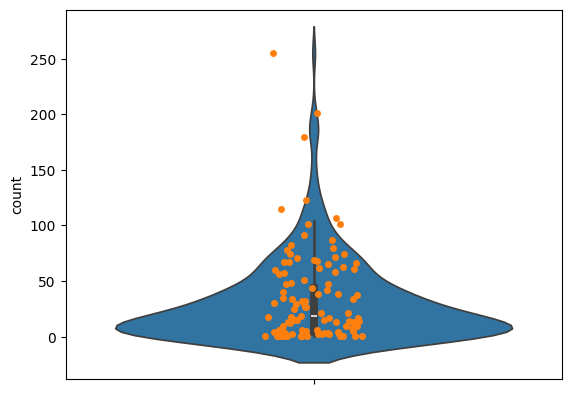

In [198]:
#YOUR CODE BELOW

# Create a violin plot for total number of events
create_violinplot(data=count_df, y='count')

#### Number of event types

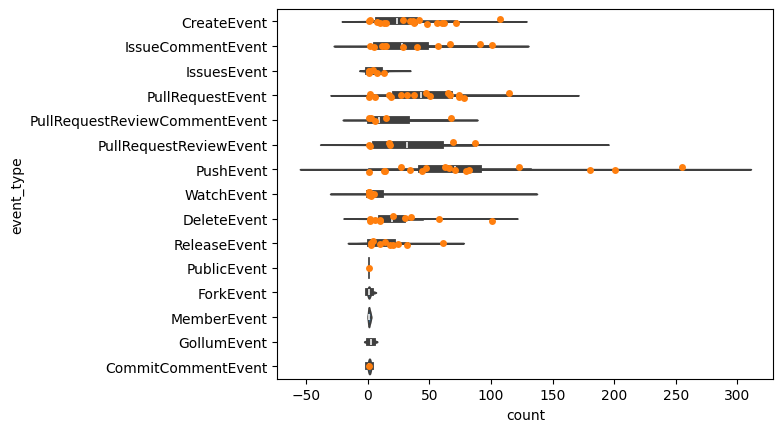

In [199]:
# YOUR CODE BELOW
# Create a violin plot for number of events types 
create_violinplot(data=count_df, x='count', y='event_type')

#### Mean number of events per event type

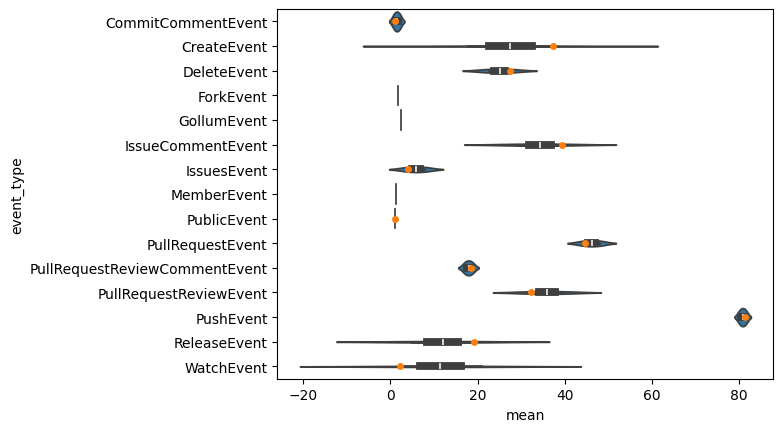

In [200]:
# YOUR CODE BELOW

# Create a violin plot for mean number of events per even type 
mean_df = count_df.groupby(['event_type', 'type'])['count'].mean().reset_index(name='mean')
create_violinplot(data=mean_df, x='mean', y='event_type')

#### Mean number of events per event group

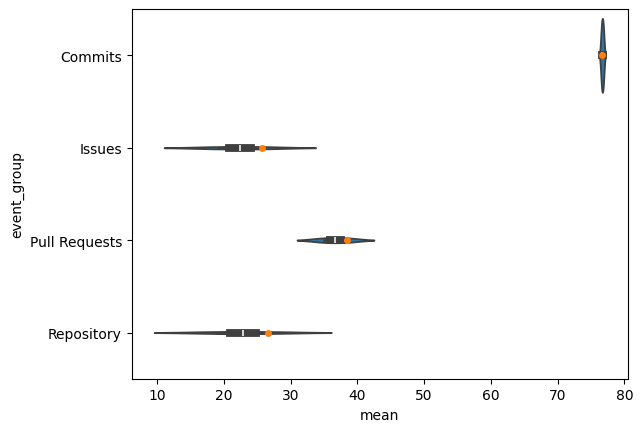

In [201]:
# YOUR CODE BELOW
#mean number of events per event group
mean_df = count_df.groupby(['event_group', 'type'])['count'].mean().reset_index(name='mean')
create_violinplot(data=mean_df, x='mean', y='event_group')

#### Gini coeﬃcient of time between consecutive event

In [202]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [203]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

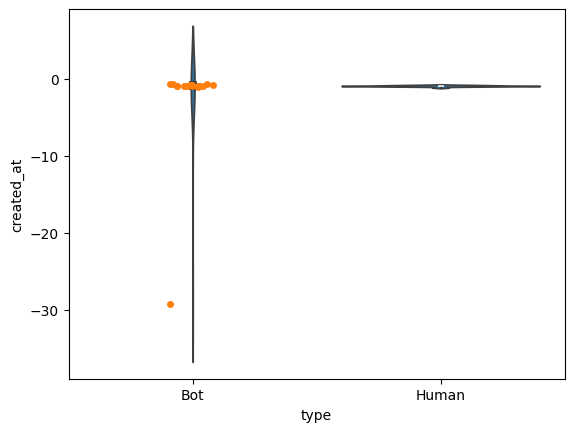

In [208]:
# YOUR CODE BELOW

# Convert created_at to datetime
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])

# Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'
gini_df = merged_df.groupby('contributor')['created_at'].agg(gini).reset_index()

# Merge the resultant DataFrame with their type
gini_df = gini_df.merge(final_df[['contributor', 'type']], on='contributor', how='left')

# Make box/boxen/violin plots on those gini values
create_violinplot(gini_df, y='created_at', x='type')

### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

In [211]:
#he most noticeable outliers are within the commits event group. This is understandable as certain automated bots are designed to generate commits.

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

In [210]:
#Yes bots have.

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?